# Import packages

In [1]:
%run "settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

# Create user defined funtions

### Clean() - removes all string values from integer columns

In [2]:
def Clean(df):
    for df in dataframes:
        for col in df.columns:
            vals = ['nan', 'NP', 'NEW', 'SUPP', 'NE', 'NSE', 'NA', 'NaT', 'NAT', '', ' ', 'DNS', 'NAT_TOTSF']
            df[col] = df[col][~df[col].isin(vals)]
            if col == 'URN':
                extras = ['PRI', 'SEC']
                df[col] = df[col][~df[col].isin(extras)]
                df[col] = df[col].astype(float)   

### Join() - joins all academic years dataframes together

In [3]:
def Join(df, df1, df2, df3, df4):
    new_df = df.merge(df1, on='URN', suffixes=('', '_remove'))\
    .merge(df2, on='URN', suffixes=('', '_remove'))\
    .merge(df3, on='URN', suffixes=('', '_remove'))\
    .merge(df4, on='URN', suffixes=('', '_remove'))
    return new_df

### cumulatively_categorise() - deals with high cardinality categorical variables. From: https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b

In [4]:
def cumulatively_categorise(column, threshold = 0.75, return_categories_list = True):
    threshold_value = int(threshold*len(column))
    categories_list = []
    s = 0
    counts = Counter(column)
    
    for i,j in counts.most_common():
        s += counts[i]
        categories_list.append(i)
        if s >= threshold_value:
            break
    categories_list.append('Other')
    
    new_column=column.apply(lambda x: x if x in categories_list else 'Other')
    
    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column

### State the file path

In [5]:
#filepath = 'D:\\Schools Data\\Data\\'
filepath = 'C:\\Users\\matth\\OneDrive\\Documents\\University\\Schools Data\\Data\\'

#  

# Import datasets

### 2010-2011

In [6]:
# Import the KS4 information
ks4_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_spine.csv', low_memory = False)

# Import absence data
abs_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_abs.csv', low_memory = False)

# Import school census data
census_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2010_2011 = pd.read_csv(filepath + '2010-2011\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2010_2011['ACADEMIC_YEAR'] = 2011

# List the dataframes
dataframes = [ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2010_2011 = Join(ks4_2010_2011, spine_2010_2011, abs_2010_2011, census_2010_2011, teacher_info_2010_2011)

# Select the relevant columns
ks4_2010_2011 = ks4_2010_2011[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA', 
                               'RATPUPTEA']]

### 2011-2012

In [7]:
# Import the KS4 information
ks4_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_spine.csv', low_memory = False)

# Import absence data
abs_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_abs.csv', low_memory = False)

# Import school census data
census_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2011_2012 = pd.read_csv(filepath + '2011-2012\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2011_2012['ACADEMIC_YEAR'] = 2012

# List the dataframes
dataframes = [ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012]

# Use the function to clean the dataframes
Clean(dataframes)
                    
# Join all tables together
ks4_2011_2012 = Join(ks4_2011_2012, spine_2011_2012, abs_2011_2012, census_2011_2012, teacher_info_2011_2012)

# Select the relevant columns
ks4_2011_2012 = ks4_2011_2012[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA', 
                               'RATPUPTEA']]

### 2012-2013

In [8]:
# Import the KS4 information
ks4_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_ks4final.csv',  low_memory = False)

# Import the school information
spine_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_spine.csv', low_memory = False)

# Import absence data
abs_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_abs.csv', low_memory = False)

# Import school census data
census_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2012_2013 = pd.read_csv(filepath + '2012-2013\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2012_2013['ACADEMIC_YEAR'] = 2013

# List the dataframes
dataframes = [ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2012_2013 = Join(ks4_2012_2013, spine_2012_2013, abs_2012_2013, census_2012_2013, teacher_info_2012_2013)
 
# Select the relevant columns
ks4_2012_2013 = ks4_2012_2013[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM',
                               'PTL2BASICS',
                               'TAVENT_E',
                               'PTANYQ',
                               'PERCTOT',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA', 
                               'RATPUPTEA']]

### 2013-2014

In [9]:
# Import the KS4 information
ks4_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_ks4final.csv', low_memory = False, encoding='latin-1')

# Import the school information
spine_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_spine.csv', low_memory = False)

# Import absence data
abs_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_abs.csv', low_memory = False)

# Import school census data
census_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2013_2014 = pd.read_csv(filepath + '2013-2014\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2013_2014['ACADEMIC_YEAR'] = 2014

# List the dataframes
dataframes = [ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2013_2014 = Join(ks4_2013_2014, spine_2013_2014, abs_2013_2014, census_2013_2014, teacher_info_2013_2014)

# Select the relevant columns
ks4_2013_2014 = ks4_2013_2014[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ',
                               'PTL2BASICS_PTQ',
                               'TAVENT_E_PTQ',
                               'PTANYQ_PTQ',
                               'PERCTOT',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSMCLA', 
                               'RATPUPTEA']]

### 2014-2015

In [10]:
# Import the KS4 information
ks4_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_spine.csv', low_memory = False)

# Import absence data
abs_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_abs.csv', low_memory = False)

# Import school census data
census_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_census.csv', low_memory = False)

# Import teacher info data
teacher_info_2014_2015 = pd.read_csv(filepath + '2014-2015\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2014_2015['ACADEMIC_YEAR'] = 2015

# List the dataframes
dataframes = [ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2014_2015 = Join(ks4_2014_2015, spine_2014_2015, census_2014_2015, teacher_info_2014_2015, abs_2014_2015)

# Select the relevant columns
ks4_2014_2015 = ks4_2014_2015[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_PTQ_EE',
                               'TAVENT_E_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'SALARY',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A', 
                               'RATPUPTEA']]

### 2015-2016

In [11]:
# Import the KS4 information
ks4_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_spine.csv', low_memory = False)

# Import absence data
abs_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_abs.csv', low_memory = False)

# Import school census data
census_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2015_2016 = pd.read_csv(filepath + '2015-2016\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2015_2016['ACADEMIC_YEAR'] = 2016

# List the dataframes
dataframes = [ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2015_2016 = Join(ks4_2015_2016, spine_2015_2016, abs_2015_2016, census_2015_2016, teacher_info_2015_2016)

# Select the relevant columns
ks4_2015_2016 = ks4_2015_2016[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PTAC5EM_PTQ_EE',
                               'PTL2BASICS_LL_PTQ_EE',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A', 
                              'Pupil:     Teacher Ratio']]

### 2016-2017

In [12]:
# Import the KS4 information
ks4_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_spine.csv', low_memory = False)

# Import absence data
abs_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_abs.csv', low_memory = False)

# Import school census data
census_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_census.csv', low_memory = False)

# Import the provisionsal KS4 data
teacher_info_2016_2017 = pd.read_csv(filepath + '2016-2017\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2016_2017['ACADEMIC_YEAR'] = 2017

# List the dataframes
dataframes = [ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2016_2017 = Join(ks4_2016_2017, spine_2016_2017, census_2016_2017, teacher_info_2016_2017, abs_2016_2017)

# Select the relevant columns
ks4_2016_2017 = ks4_2016_2017[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'Mean Gross FTE Salary of All Teachers',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A', 
                               'Pupil:     Teacher Ratio']]

### 2017-2018

In [13]:
# Import the KS4 information
ks4_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_spine.csv', low_memory = False)

# Import absence data
abs_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_abs.csv',low_memory = False)

# Import school census data
census_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2017_2018 = pd.read_csv(filepath + '2017-2018\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2017_2018['ACADEMIC_YEAR'] = 2018

# List the dataframes
dataframes = [ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2017_2018 = Join(ks4_2017_2018, spine_2017_2018, abs_2017_2018, census_2017_2018, teacher_info_2017_2018) 

# Select the relevant columns
ks4_2017_2018 = ks4_2017_2018[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A', 
                               'Pupil:     Teacher Ratio']]

### 2018-2019

In [14]:
# Import the KS4 information
ks4_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_ks4final.csv', low_memory = False)

# Import the school information
spine_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_school_information.csv', low_memory = False)

# Import absence data
abs_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_abs.csv', low_memory = False)

# Import school census data
census_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_census.csv', low_memory = False)

# Import school census data
teacher_info_2018_2019 = pd.read_csv(filepath + '2018-2019\\england_swf.csv', low_memory = False)

# Add the academic year flag variable
ks4_2018_2019['ACADEMIC_YEAR'] = 2019

# List the dataframes
dataframes = [ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019]

# Use the function to clean the dataframes
Clean(dataframes)

# Join all tables together
ks4_2018_2019 = Join(ks4_2018_2019, spine_2018_2019, abs_2018_2019, census_2018_2019, teacher_info_2018_2019)

# Select the relevant columns
ks4_2018_2019 = ks4_2018_2019[['URN',
                               'POSTCODE',
                               'ACADEMIC_YEAR',
                               'KS2APS',
                               'PT5EM_94',
                               'PTL2BASICS_94',
                               'TAVENT_E_3NG_PTQ_EE',
                               'PTANYQ_PTQ_EE',
                               'PERCTOT',
                               'Mean Gross FTE Salary of All Teachers (£s)',
                               'ISPOST16',
                               'ISPRIMARY',
                               'ADMPOL',
                               'RELDENOM',
                               'NFTYPE',
                               'GENDER',
                               'PNUMEAL',
                               'PTFSM6CLA1A', 
                               'Pupil:     Teacher Ratio']]

#  

# Data Cleaning

### Renaming variables to ensure coherence across datasets and allow for joining

In [15]:
# 2013/14
dict = {'PTAC5EM_PTQ' : 'PTAC5EM',
        'PTL2BASICS_PTQ': 'PTL2BASICS',
        'TAVENT_E_PTQ' : 'TAVENT_E',
        'PTANYQ_PTQ': 'PTANYQ'
        }
ks4_2013_2014.rename(columns=dict, inplace=True)

# 2014/15
dict = {'PTAC5EM_PTQ_EE' : 'PTAC5EM',
        'PTL2BASICS_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',
        'PTFSM6CLA1A' : 'PTFSMCLA'
        }
ks4_2014_2015.rename(columns=dict, inplace=True)

# 2015/16
dict = {'PTAC5EM_PTQ_EE': 'PTAC5EM',
        'PTL2BASICS_LL_PTQ_EE': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'PTFSM6CLA1A' : 'PTFSMCLA',
        'Pupil:     Teacher Ratio' : 'RATPUPTEA'
        }
ks4_2015_2016.rename(columns=dict, inplace=True)

# 2016/17
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers' : 'SALARY',
        'PTFSM6CLA1A' : 'PTFSMCLA',
        'Pupil:     Teacher Ratio' : 'RATPUPTEA'
       }
ks4_2016_2017.rename(columns=dict, inplace=True)

# 2017/18
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',        
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'PTFSM6CLA1A' : 'PTFSMCLA',
        'Pupil:     Teacher Ratio' : 'RATPUPTEA'
       }
ks4_2017_2018.rename(columns=dict, inplace=True)

# 2018/19
dict = {'PT5EM_94': 'PTAC5EM',
        'PTL2BASICS_94': 'PTL2BASICS',
        'TAVENT_E_3NG_PTQ_EE' : 'TAVENT_E',
        'PTANYQ_PTQ_EE' : 'PTANYQ',    
        'FSM' : 'PNUMFSM',    
        'PSENSE4' : 'PSENAPS4',
        'Mean Gross FTE Salary of All Teachers (£s)' : 'SALARY',
        'PTFSM6CLA1A' : 'PTFSMCLA',
        'Pupil:     Teacher Ratio' : 'RATPUPTEA'
       }
ks4_2018_2019.rename(columns=dict, inplace=True)

#  

### Stack the data tables

In [16]:
stacked_data = pd.concat([ks4_2011_2012, 
                          ks4_2012_2013,
                          ks4_2013_2014,
                          ks4_2014_2015,
                          ks4_2015_2016,
                          ks4_2016_2017,
                          ks4_2017_2018,
                          ks4_2018_2019], 
                         ignore_index=True)

### Impute RELDENOM and ADMPOL and remove rows with null values


In [17]:
stacked_data["RELDENOM"].fillna("Does not apply", inplace = True)
stacked_data["ADMPOL"].fillna("Does not apply", inplace = True)

# Drop NULL values
stacked_data_clean = stacked_data.dropna()

#  

# Import the Ofsted Data and clean it 

In [18]:
latest_ratings_2019 = pd.read_csv(filepath + 'Management_information_-_schools_Table1_-_31_August_2019.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings_2020 = pd.read_csv(filepath + 'Management_information_-_state-funded_schools_-_latest_inspections_at_31_December_2020.csv',
                                  encoding = 'cp1252',
                                  low_memory = False)

latest_ratings = pd.concat([latest_ratings_2019, 
                             latest_ratings_2020], 
                            ignore_index = False)

In [19]:
# Create snake case
latest_ratings.columns = latest_ratings.columns.str.replace(' ', '_')

# Filter to specific inspection types
latest_ratings = latest_ratings[(latest_ratings['Event_type_grouping'] == 'Schools - S5') |
                                (latest_ratings['Event_type_grouping'] == 'Section 8 deemed section 5 (excluding short inspections)') |
                                (latest_ratings['Event_type_grouping'] == 'Short inspection converted')]

# Select only Secondary schools
latest_ratings = latest_ratings[(latest_ratings['Ofsted_phase'] == 'Secondary')]

In [20]:
# Select variables
latest_ratings = latest_ratings[['URN',
                                 'Inspection_end_date',
                                 'Overall_effectiveness', # Target variable
                                 'Previous_inspection_end_date',
                                 'Previous_full_inspection_overall_effectiveness',
                                 'Previous_category_of_concern']]

# Fill empty Previous_category_of_concern with 'No concern'
latest_ratings["Previous_category_of_concern"].fillna("No concern", inplace = True)

# Drop missing values
latest_ratings = latest_ratings.dropna()

## Extract the academic year from the inspection data to create a linkage year

In [21]:
# Split the year column into day, month and year
latest_ratings[["DAY", "MONTH", "YEAR"]] = latest_ratings["Inspection_end_date"].str.split("/", expand = True)

# Convert these values to integers
latest_ratings[['MONTH', 'YEAR']] = latest_ratings[['MONTH', 'YEAR']].astype(int)

# Derive the academic year
def flag_df(df):
    if (df['MONTH'] >= 9):
        return df['YEAR'] + 1
    elif (df['MONTH'] <= 8):
        return df['YEAR']
    
latest_ratings['ACADEMIC_YEAR'] = latest_ratings.apply(flag_df, axis = 1)

# Count number of days since the last inspection
latest_ratings['Inspection_end_date'] = pd.to_datetime(latest_ratings['Inspection_end_date'],
                                                       format = "%d/%m/%Y")
latest_ratings['Previous_inspection_end_date'] = pd.to_datetime(latest_ratings['Previous_inspection_end_date'],
                                                                format = "%d/%m/%Y")

latest_ratings['DAYS_SINCE_LAST'] = (latest_ratings['Inspection_end_date'] - latest_ratings['Previous_inspection_end_date']) / np.timedelta64(1, 'D')

# Do YEAR - 1 to create a linkage year
latest_ratings['LINKAGE_YEAR'] = latest_ratings['ACADEMIC_YEAR'] - 1

## Join the most recent OFSTED rating to the academic data and drop rows with null values

In [22]:
final_table = pd.merge(stacked_data_clean, 
                       latest_ratings, 
                       how='left', 
                       left_on=['URN','ACADEMIC_YEAR'], 
                       right_on = ['URN','LINKAGE_YEAR'])

# Select columns needed
final_table = final_table.drop(['ACADEMIC_YEAR_x',
                                'ACADEMIC_YEAR_y',
                                'LINKAGE_YEAR',
                                'DAY', 
                                'MONTH', 
                                'YEAR', 
                                'Previous_inspection_end_date',
                                'Inspection_end_date'], 
                               axis=1)

# Drop any missing columns an duplicated schools
final_table = final_table.dropna()
final_table = final_table.drop_duplicates()

len(final_table)

1826

# Join IDACI Quintiles

In [23]:
# Extract the postcodes to CSV
# postcodes = final_table[['POSTCODE']]
# postcodes.to_csv('Postcodes.csv', index = False)

In [24]:
# Import IDACI lookup 
idaci_quintiles = pd.read_csv('C:\\Users\\matth\\OneDrive\\Documents\\University\\Third Year\\Work Based Project\\Final\\Code\\2019-deprivation-by-postcode.csv')

# Select relevant columns 
idaci_quintiles = idaci_quintiles[['Postcode', 'IDACI Decile']]

# Join IDACI lookup to data
final_table = pd.merge(final_table, 
                       idaci_quintiles, 
                       how='left', 
                       left_on='POSTCODE', 
                       right_on = 'Postcode')

# Remove all totally duplicated values
final_table = final_table.drop_duplicates()

# Remove linking variables
final_table = final_table.drop(['POSTCODE',
                                'Postcode'], 
                               axis=1)

#  

# Create dummy variables for all categorical variables

In [25]:
remapped_reldenom = {'Does not apply' : '0',
                     'Roman Catholic': "1",
                     'Church of England' : "1", 
                     'Roman Catholic/Church of England' : "1",
                     'Church of England/Roman Catholic' : "1",
                     'Church of England/Christian' : "1",
                     'Unknown' : "0",
                     'Christian' : '1',
                     'Muslim' : '1',
                     'Sikh' : '1',
                     'Jewish' : '1',
                     'None' : '0',
                     None : '0'} 

final_table = final_table.replace({"RELDENOM": remapped_reldenom})

In [26]:
previous_category_concern = {'SM' : "1", 
                             'SWK' : "1",
                             'NTI' : '1',
                             'No concern' : '0'}  

final_table = final_table.replace({"Previous_category_of_concern": previous_category_concern})

In [27]:
admission_policy = {'COMP' : "0", 
                    'SEL' : "1",
                    'MOD' : '1',
                    'Does not apply' : '0'}  

final_table = final_table.replace({"ADMPOL": admission_policy})

In [28]:
gender = {'Girls' : "0", 
          'Boys' : "0",
          'Mixed' : '1'}  

final_table = final_table.replace({"GENDER": gender})

In [29]:
final_table['NFTYPE'] = cumulatively_categorise(final_table['NFTYPE'], 
                                                return_categories_list = False)

In [30]:
# Filter to remove 'UK' from ADMPOL
vals = ['0', '1']
final_table = final_table[final_table['ADMPOL'].isin(vals)]

final_table = pd.get_dummies(final_table, 
                             columns = ['NFTYPE',
                                        'Previous_full_inspection_overall_effectiveness',
                                        'IDACI Decile'])

# Replace boolean values with integers
final_table = final_table.replace(to_replace = True,  value = 1) 
final_table = final_table.replace(to_replace = False, value = 0) 

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,NFTYPE_Other,Previous_full_inspection_overall_effectiveness_1.0,Previous_full_inspection_overall_effectiveness_2.0,Previous_full_inspection_overall_effectiveness_3.0,Previous_full_inspection_overall_effectiveness_4.0,IDACI Decile_1.0,IDACI Decile_2.0,IDACI Decile_3.0,IDACI Decile_4.0,IDACI Decile_5.0,IDACI Decile_6.0,IDACI Decile_7.0,IDACI Decile_8.0,IDACI Decile_9.0,IDACI Decile_10.0
0,100055.00,26.8,67%,67%,11.3,100%,5.9,48436,1,0,0,1,1,62.1,54%,...,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,100051.00,26.3,62%,63%,10.8,98%,5.9,48289,1,0,0,0,1,87.8,73%,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,105135.00,27.3,64%,64%,12.9,100%,4.7,44842,0,0,0,1,1,45.3,42%,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,131609.00,26.5,57%,57%,12.4,100%,4.8,44124,1,0,0,0,1,40.0,59%,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,137442.00,25.6,52%,52%,10.2,100%,5.1,46350,1,0,0,0,0,68.6,69%,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,137080.00,29.2,63%,67%,7.9,99%,6.00,"£38,144",0,0,0,0,1,3.10,18%,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2085,140047.00,26.9,48%,53%,8.1,100%,6.70,"£38,151",0,0,0,0,1,1.90,28%,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2086,137849.00,29.7,59%,64%,8.6,100%,4.00,"£38,575",1,0,0,1,1,25.70,19%,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2088,139936.00,28.9,54%,60%,7.8,99%,6.50,"£39,096",1,0,0,0,1,7.90,30%,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


#  

# Clean the Data

In [31]:
# Remove any special characters such as a % or £ from values in the data
final_table = final_table.apply(lambda x: x.astype(str).str.replace('%',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace('£',''))
final_table = final_table.apply(lambda x: x.astype(str).str.replace(',',''))

# Convert the data to a float data type
final_table = final_table.astype(float)

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,NFTYPE_Other,Previous_full_inspection_overall_effectiveness_1.0,Previous_full_inspection_overall_effectiveness_2.0,Previous_full_inspection_overall_effectiveness_3.0,Previous_full_inspection_overall_effectiveness_4.0,IDACI Decile_1.0,IDACI Decile_2.0,IDACI Decile_3.0,IDACI Decile_4.0,IDACI Decile_5.0,IDACI Decile_6.0,IDACI Decile_7.0,IDACI Decile_8.0,IDACI Decile_9.0,IDACI Decile_10.0
0,100055.00,26.80,67.00,67.00,11.30,100.00,5.90,48436.00,1.00,0.00,0.00,1.00,1.00,62.10,54.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,100051.00,26.30,62.00,63.00,10.80,98.00,5.90,48289.00,1.00,0.00,0.00,0.00,1.00,87.80,73.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,105135.00,27.30,64.00,64.00,12.90,100.00,4.70,44842.00,0.00,0.00,0.00,1.00,1.00,45.30,42.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,131609.00,26.50,57.00,57.00,12.40,100.00,4.80,44124.00,1.00,0.00,0.00,0.00,1.00,40.00,59.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,137442.00,25.60,52.00,52.00,10.20,100.00,5.10,46350.00,1.00,0.00,0.00,0.00,0.00,68.60,69.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,137080.00,29.20,63.00,67.00,7.90,99.00,6.00,38144.00,0.00,0.00,0.00,0.00,1.00,3.10,18.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2085,140047.00,26.90,48.00,53.00,8.10,100.00,6.70,38151.00,0.00,0.00,0.00,0.00,1.00,1.90,28.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2086,137849.00,29.70,59.00,64.00,8.60,100.00,4.00,38575.00,1.00,0.00,0.00,1.00,1.00,25.70,19.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2088,139936.00,28.90,54.00,60.00,7.80,99.00,6.50,39096.00,1.00,0.00,0.00,0.00,1.00,7.90,30.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [32]:
# Rename the new variables to follow the format of the others
dict = {'Overall_effectiveness': 'RECENT_SCORE', 
        'NFTYPE_AC' : 'ACADEMY_NFTYPE_DUMMY',
        'NFTYPE_ACC' : 'ACC_NFTYPE_DUMMY', 
        'NFTYPE_CY' : 'CY_NFTYPE_DUMMY',
        'NFTYPE_Other' : 'OTHER_NFTYPE_DUMMY', 
        'Previous_full_inspection_overall_effectiveness_1.0' : 'OUTSTANDING_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_2.0' : 'GOOD_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_3.0' : 'REQUIRES_IMPROVEMENT_PREVIOUS',
        'Previous_full_inspection_overall_effectiveness_4.0' : 'INADEQUATE_PREVIOUS',
        'IDACI Decile_1.0' : 'IDACI_DECILE_1_DUMMY',
        'IDACI Decile_2.0' : 'IDACI_DECILE_2_DUMMY',
        'IDACI Decile_3.0' : 'IDACI_DECILE_3_DUMMY',
        'IDACI Decile_4.0' : 'IDACI_DECILE_4_DUMMY',
        'IDACI Decile_5.0' : 'IDACI_DECILE_5_DUMMY',
        'IDACI Decile_6.0' : 'IDACI_DECILE_6_DUMMY',
        'IDACI Decile_7.0' : 'IDACI_DECILE_7_DUMMY',
        'IDACI Decile_8.0' : 'IDACI_DECILE_8_DUMMY',
        'IDACI Decile_9.0' : 'IDACI_DECILE_9_DUMMY',
        'IDACI Decile_10.0' : 'IDACI_DECILE_10_DUMMY',
        'Previous_category_of_concern' : 'PREVIOUS_CONCERN'}

final_table.rename(columns=dict,
                   inplace=True)

final_table

,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,...,OTHER_NFTYPE_DUMMY,OUTSTANDING_PREVIOUS,GOOD_PREVIOUS,REQUIRES_IMPROVEMENT_PREVIOUS,INADEQUATE_PREVIOUS,IDACI_DECILE_1_DUMMY,IDACI_DECILE_2_DUMMY,IDACI_DECILE_3_DUMMY,IDACI_DECILE_4_DUMMY,IDACI_DECILE_5_DUMMY,IDACI_DECILE_6_DUMMY,IDACI_DECILE_7_DUMMY,IDACI_DECILE_8_DUMMY,IDACI_DECILE_9_DUMMY,IDACI_DECILE_10_DUMMY
0,100055.00,26.80,67.00,67.00,11.30,100.00,5.90,48436.00,1.00,0.00,0.00,1.00,1.00,62.10,54.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,100051.00,26.30,62.00,63.00,10.80,98.00,5.90,48289.00,1.00,0.00,0.00,0.00,1.00,87.80,73.00,...,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,105135.00,27.30,64.00,64.00,12.90,100.00,4.70,44842.00,0.00,0.00,0.00,1.00,1.00,45.30,42.00,...,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,131609.00,26.50,57.00,57.00,12.40,100.00,4.80,44124.00,1.00,0.00,0.00,0.00,1.00,40.00,59.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,137442.00,25.60,52.00,52.00,10.20,100.00,5.10,46350.00,1.00,0.00,0.00,0.00,0.00,68.60,69.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,137080.00,29.20,63.00,67.00,7.90,99.00,6.00,38144.00,0.00,0.00,0.00,0.00,1.00,3.10,18.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2085,140047.00,26.90,48.00,53.00,8.10,100.00,6.70,38151.00,0.00,0.00,0.00,0.00,1.00,1.90,28.00,...,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2086,137849.00,29.70,59.00,64.00,8.60,100.00,4.00,38575.00,1.00,0.00,0.00,1.00,1.00,25.70,19.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2088,139936.00,28.90,54.00,60.00,7.80,99.00,6.50,39096.00,1.00,0.00,0.00,0.00,1.00,7.90,30.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Data Validation

In [35]:
final_table = final_table[(final_table['KS2APS'] > 0) &
                          (final_table['PTAC5EM'] > 0) &
                          (final_table['PTL2BASICS'] > 0)&
                          (final_table['TAVENT_E'] > 0) &
                          (final_table['PTANYQ'] > 0) &
                          (final_table['PERCTOT'] > 0) &
                          (final_table['SALARY'] > 0) &
                          (final_table['PTFSMCLA'] > 0) &
                          (final_table['RATPUPTEA'] > 0)]

# Normalise the Data

In [36]:
for col in final_table[['KS2APS',
                        'PTAC5EM',
                        'PTL2BASICS',
                        'TAVENT_E',
                        'PTANYQ',
                        'PERCTOT',
                        'PTFSMCLA',
                        'SALARY',
                        'PNUMEAL',
                        'RATPUPTEA', 
                        'DAYS_SINCE_LAST']]:
    
    final_table[col] = (final_table[col] - final_table[col].mean()) / final_table[col].std()  

pd.set_option('display.max_columns', None) 
final_table

C:\Users\matth\AppData\Local\Temp\ipykernel_5492\3474186581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_table[col] = (final_table[col] - final_table[col].mean()) / final_table[col].std()


,URN,KS2APS,PTAC5EM,PTL2BASICS,TAVENT_E,PTANYQ,PERCTOT,SALARY,ISPOST16,ISPRIMARY,ADMPOL,RELDENOM,GENDER,PNUMEAL,PTFSMCLA,RATPUPTEA,RECENT_SCORE,PREVIOUS_CONCERN,DAYS_SINCE_LAST,ACADEMY_NFTYPE_DUMMY,ACC_NFTYPE_DUMMY,OTHER_NFTYPE_DUMMY,OUTSTANDING_PREVIOUS,GOOD_PREVIOUS,REQUIRES_IMPROVEMENT_PREVIOUS,INADEQUATE_PREVIOUS,IDACI_DECILE_1_DUMMY,IDACI_DECILE_2_DUMMY,IDACI_DECILE_3_DUMMY,IDACI_DECILE_4_DUMMY,IDACI_DECILE_5_DUMMY,IDACI_DECILE_6_DUMMY,IDACI_DECILE_7_DUMMY,IDACI_DECILE_8_DUMMY,IDACI_DECILE_9_DUMMY,IDACI_DECILE_10_DUMMY
0,100055.00,-0.77,0.82,0.61,1.20,0.61,0.09,3.33,1.00,0.00,0.00,1.00,1.00,2.58,1.49,-0.73,2.00,0.00,0.06,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,100051.00,-1.16,0.45,0.30,0.88,-0.87,0.09,3.28,1.00,0.00,0.00,0.00,1.00,3.97,2.67,-0.38,2.00,0.00,-1.36,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,105135.00,-0.37,0.60,0.38,2.22,0.61,-0.90,2.05,0.00,0.00,0.00,1.00,1.00,1.67,0.75,-1.03,2.00,0.00,1.45,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,131609.00,-1.00,0.08,-0.17,1.90,0.61,-0.81,1.79,1.00,0.00,0.00,0.00,1.00,1.39,1.80,7.14,2.00,0.00,0.06,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,137442.00,-1.70,-0.29,-0.55,0.50,0.61,-0.57,2.59,1.00,0.00,0.00,0.00,0.00,2.93,2.42,-0.55,1.00,0.00,1.33,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,137080.00,1.11,0.52,0.61,-0.96,-0.13,0.17,-0.35,0.00,0.00,0.00,0.00,1.00,-0.60,-0.73,0.36,2.00,0.00,0.35,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2085,140047.00,-0.69,-0.59,-0.47,-0.83,0.61,0.74,-0.34,0.00,0.00,0.00,0.00,1.00,-0.67,-0.11,-1.68,2.00,0.00,-0.76,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2086,137849.00,1.50,0.23,0.38,-0.52,0.61,-1.47,-0.19,1.00,0.00,0.00,1.00,1.00,0.62,-0.67,0.19,2.00,0.00,-0.68,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2088,139936.00,0.88,-0.14,0.07,-1.02,-0.13,0.58,-0.01,1.00,0.00,0.00,0.00,1.00,-0.34,0.01,0.75,3.00,0.00,0.88,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#  

In [37]:
# Drop variables that will cause the variable trap
dropped_columns = ['URN',
                   'ACC_NFTYPE_DUMMY',
                   'REQUIRES_IMPROVEMENT_PREVIOUS',
                   'IDACI_DECILE_2_DUMMY']

final_table = final_table.drop(columns = dropped_columns)

In [38]:
# Create the target variable
y = final_table.RECENT_SCORE

In [39]:
# Create feature variables
dropped_columns = ['RECENT_SCORE']
X = final_table.drop(columns = dropped_columns)

In [40]:
# Set the seed
random_seed = 42

In [41]:
# Select feature columns
feature_cols = ['KS2APS', 
                'PTAC5EM', 
                'PTL2BASICS', 
                'TAVENT_E', 
                'PTANYQ',
                'PERCTOT', 
                'SALARY',
                'ISPOST16', 
                'ISPRIMARY',
                'RELDENOM', 
                'GENDER',
                'ADMPOL',
                'PNUMEAL',
                'PTFSMCLA', 
                'RATPUPTEA', 
                'PREVIOUS_CONCERN', 
                'DAYS_SINCE_LAST', 
                'ACADEMY_NFTYPE_DUMMY',
                'CY_NFTYPE_DUMMY',
                'OTHER_NFTYPE_DUMMY',
                'GOOD_PREVIOUS', 
                'OUTSTANDING_PREVIOUS',
                'INADEQUATE_PREVIOUS', 
                'IDACI_DECILE_1_DUMMY',
                'IDACI_DECILE_3_DUMMY', 
                'IDACI_DECILE_4_DUMMY',
                'IDACI_DECILE_5_DUMMY',
                'IDACI_DECILE_6_DUMMY',
                'IDACI_DECILE_7_DUMMY',
                'IDACI_DECILE_8_DUMMY',
                'IDACI_DECILE_9_DUMMY',
                'IDACI_DECILE_10_DUMMY']

#  

# Create test train data
### 3 sets are needed:
* One for base models
* One for grid search
* One for tuned models

In [42]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, 
                                                            y, 
                                                            random_state = random_seed,
                                                            test_size = 0.2, # 80% training and 20% test
                                                            stratify = y) # Uses stratified sampling

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, 
                                                            y, 
                                                            random_state = random_seed,
                                                            test_size = 0.2, # 80% training and 20% test
                                                            stratify = y) # Uses stratified sampling

In [44]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, 
                                                            y, 
                                                            random_state = random_seed,
                                                            test_size = 0.2, # 80% training and 20% test
                                                            stratify = y) # Uses stratified sampling

# Model 1: Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

### Base Model

In [45]:
# Create Decision Tree classifier
unpruned_tree = DecisionTreeClassifier(random_state = random_seed)

# Train Decision Tree Classifier
unpruned_tree.fit(X_train_1,
                  y_train_1)

# Predict the response
y_pred_1 = unpruned_tree.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(unpruned_tree, 
                         X_train_1, 
                         y_train_1, 
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.60553633 0.60207612 0.63321799 0.58823529 0.52777778]
Mean accuracy: 59.099999999999994 %


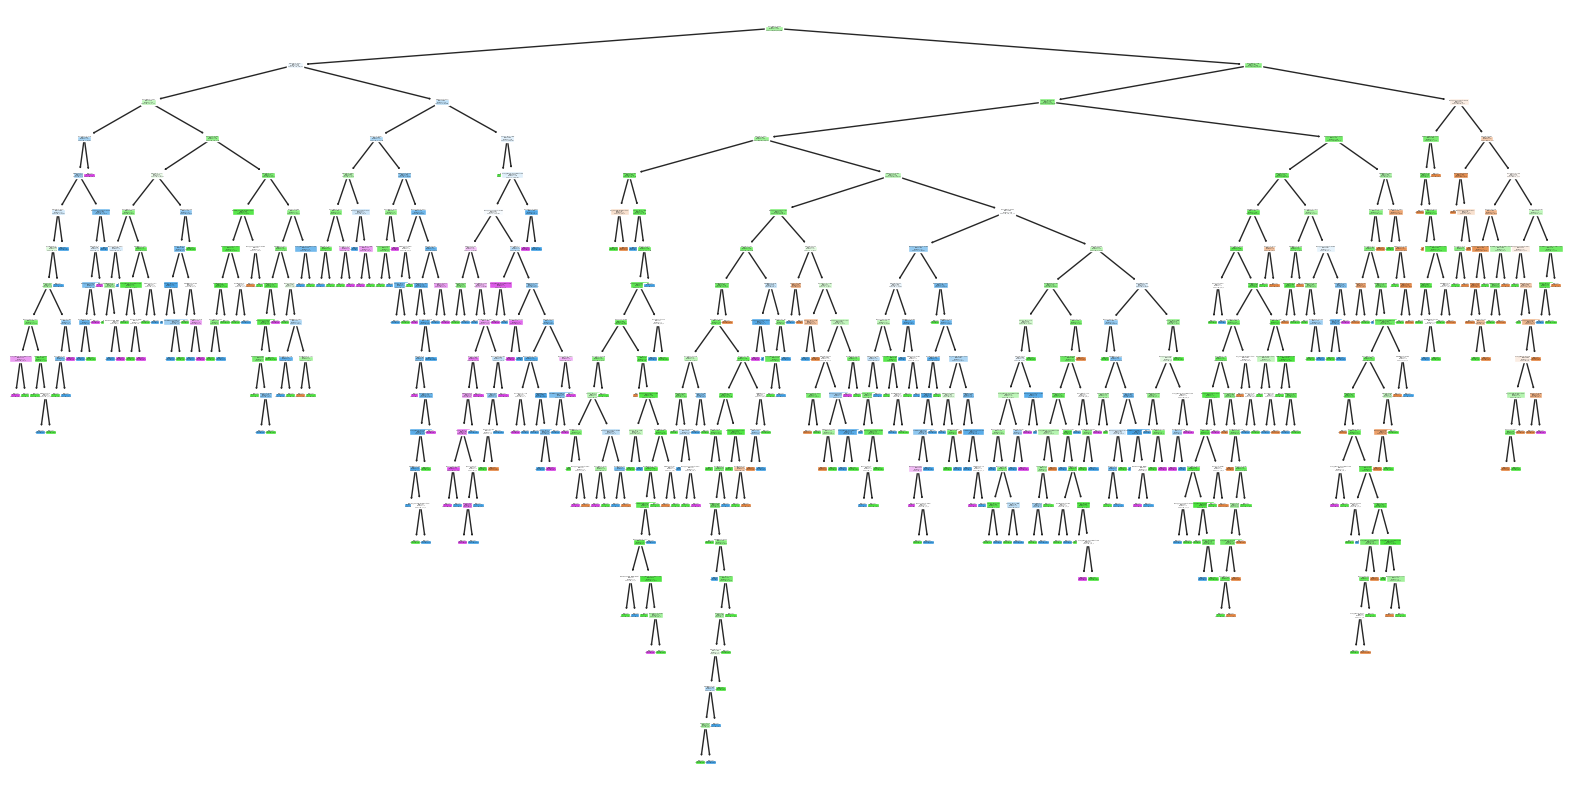

In [46]:
# Plot decision tree
plt.figure(figsize=(20,10))

plot_tree(unpruned_tree, 
          filled = True, 
          feature_names = feature_cols)

plt.show()

### Grid Search

In [49]:
startTime = time.time()

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'criterion' : ('gini', 'entropy'),
              'splitter' : ('best', 'random'),
              'max_depth' : (None, 2, 3, 4, 5, 6, 7),
              'min_samples_split' : (2, 3, 4),
              'min_samples_leaf' : (1, 2, 3),
              'max_features' : (None, 'sqrt', 'log2'),
              'random_state' : ([random_seed]),
              'max_leaf_nodes': (8, 9, 10, 11, 12, None),
              'min_impurity_decrease': ([0.0, 0.002, 0.003, 0.004]), 
              'class_weight' : (None, 'balanced'),
              'ccp_alpha': (0, 0.000001, 0.000002, 0.000003)}

# Create Grid Search object
grid_search = GridSearchCV(estimator = clf, 
                           param_grid = param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 5)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)

print('')
print("Mean accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
ccp_alpha: 0
class_weight: None
criterion: gini
max_depth: None
max_features: None
max_leaf_nodes: 10
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
random_state: 41
splitter: best

Mean accuracy: 63.0 %

Execution time in seconds: 1645.6856553554535


### Tuned Model

In [47]:
# Create Decision Tree classifier object with pruning
pruned_tree = DecisionTreeClassifier(ccp_alpha = 0,
                                     class_weight = None,
                                     criterion = 'gini',
                                     max_depth = None,
                                     max_features = None,
                                     max_leaf_nodes = 10,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     random_state = random_seed,
                                     splitter = 'best')

# Implement 5-fold cross-validation
scores = cross_val_score(pruned_tree,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

pruned_tree.fit(X_train_3,
                y_train_3)

y_pred_3 = pruned_tree.predict(X_test_3)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 2) * 100 , '%')

Accuracy scores: [0.70934256 0.66089965 0.64705882 0.66089965 0.66666667]
Mean accuracy: 67.0 %


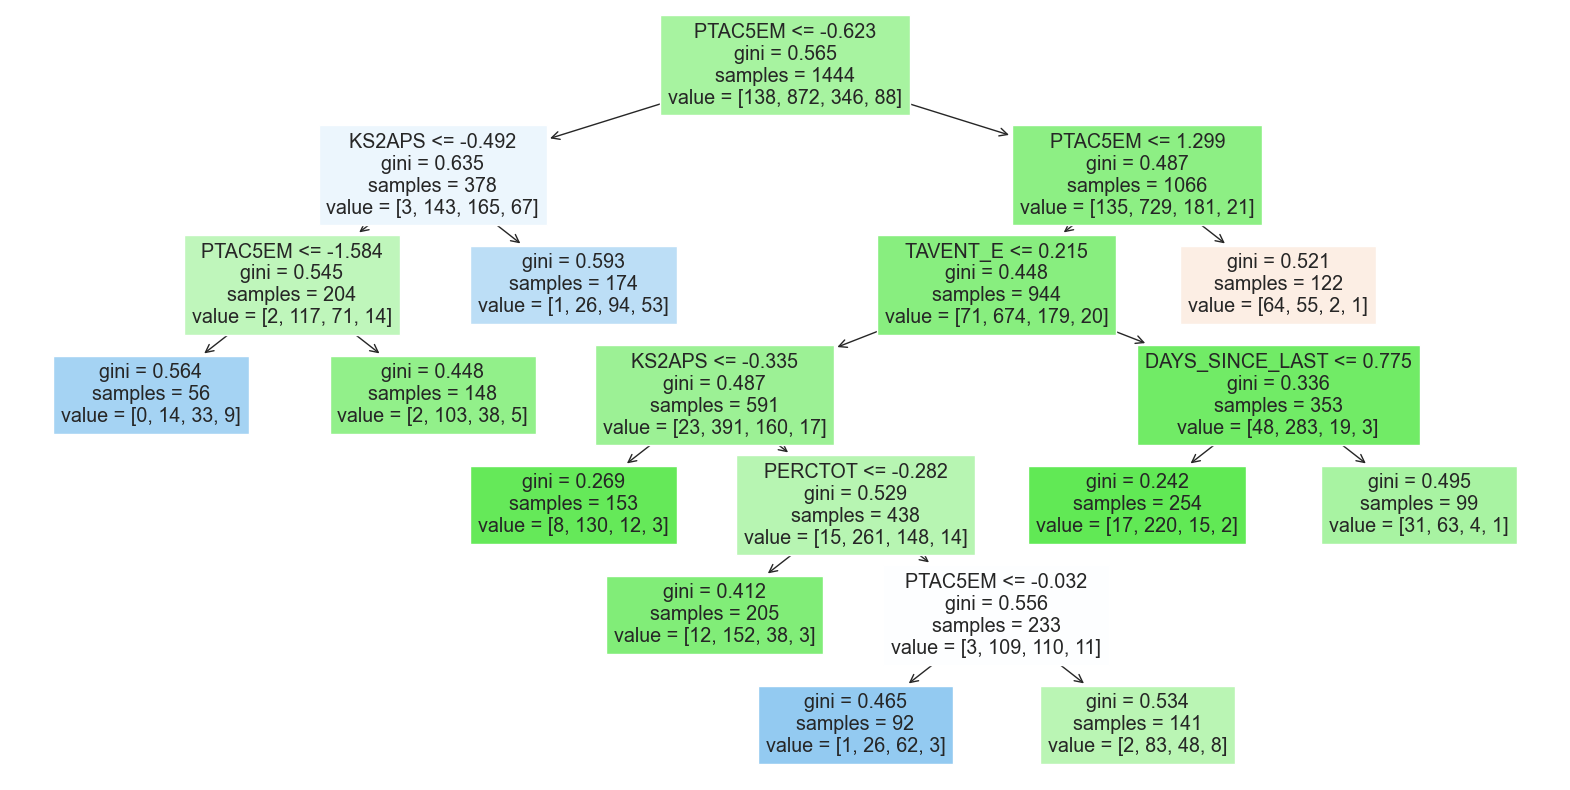

In [48]:
# Plot pruned decision tree
plt.figure(figsize=(20,10))

plot_tree(pruned_tree, 
          filled=True, 
          feature_names=feature_cols)
plt.show()

### Classification reports

In [49]:
print('\tClassification Report for Base Decision Tree :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base Decision Tree :

                       precision    recall  f1-score   support

         Outstanding       0.37      0.40      0.38        35
                Good       0.71      0.75      0.73       218
Requires Improvement       0.40      0.33      0.36        87
          Inadequate       0.19      0.18      0.19        22

            accuracy                           0.58       362
           macro avg       0.42      0.42      0.42       362
        weighted avg       0.57      0.58      0.58       362



In [50]:
print('\tClassification Report for Tuned Decision Tree :\n\n',
      classification_report(y_test_3,
                            y_pred_3,
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned Decision Tree :

                       precision    recall  f1-score   support

         Outstanding       0.47      0.40      0.43        35
                Good       0.69      0.83      0.75       218
Requires Improvement       0.47      0.39      0.43        87
          Inadequate       0.00      0.00      0.00        22

            accuracy                           0.63       362
           macro avg       0.41      0.40      0.40       362
        weighted avg       0.58      0.63      0.60       362



C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Permuation importance

In [51]:
permutation_importance_base_tree = permutation_importance(unpruned_tree, 
                                                          X_train_1, 
                                                          y_train_1, 
                                                          n_repeats=10, 
                                                          random_state=42)

feat_importances_base_tree = pd.DataFrame(permutation_importance_base_tree.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

feat_importances_base_tree.reset_index(inplace=True)
feat_importances_base_tree.columns = ['Feature', 'Importance']
feat_importances_base_tree['Model'] = 'Base Tree'

In [52]:
permutation_importance_pruned_tree = permutation_importance(pruned_tree, 
                                                            X_train_3, 
                                                            y_train_3, 
                                                            n_repeats=10, 
                                                            random_state=42)

feat_importances_tuned_tree = pd.DataFrame(permutation_importance_pruned_tree.importances_mean, 
                                index = X_test_3.columns, 
                                columns=["Importance"])

feat_importances_tuned_tree.reset_index(inplace=True)
feat_importances_tuned_tree.columns = ['Feature', 'Importance']

feat_importances_tuned_tree['Model'] = 'Tuned Tree'

In [53]:
feature_importances_decision_trees = pd.concat([feat_importances_base_tree, 
                                                feat_importances_tuned_tree], 
                                               axis=0, 
                                               ignore_index=True)

#  

# Model 2: KNN 

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Base Model

In [54]:
# Base model
knn_1 = KNeighborsClassifier() 

# Train model
knn_1.fit(X_train_1, 
          y_train_1) 

# Predict the response 
y_pred_1 = knn_1.predict(X_test_1)

# Implement 5-fold cross validation
scores = cross_val_score(knn_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores: ", scores)

# Calculate accuracy score
accuracy = accuracy_score(y_test_1, 
                          y_pred_1)

print("Mean accuracy:", round(accuracy, 3) * 100 , '%')

Accuracy scores:  [0.65743945 0.61245675 0.67474048 0.65397924 0.59027778]
Mean accuracy: 63.3 %


### Grid search

In [58]:
startTime = time.time()

# Create KNN classifier object
clf = KNeighborsClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors' : (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18),
              'weights' : ('uniform', 'distance', None),
              'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size' : (1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
              'p' : (1, 2, 3),
              'metric' : (['minkowski'])}

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)

print('')
print("Mean accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
algorithm: auto
leaf_size: 1
metric: minkowski
n_neighbors: 11
p: 1
weights: distance

Mean accuracy: 65.2 %

Execution time in seconds: 983.0208413600922


### Tuned Model

In [55]:
# Create KNN classifier object with tuned hyperparameters
tuned_KNN = KNeighborsClassifier(algorithm = 'auto',
                                 leaf_size = 1,
                                 metric = 'minkowski',
                                 n_neighbors = 11,
                                 p = 1,
                                 weights = 'distance')

# Implement 5-fold cross-validation
scores = cross_val_score(tuned_KNN,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

tuned_KNN.fit(X_train_3,
              y_train_3)

y_pred_3 = tuned_KNN.predict(X_test_3)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 2) * 100 , '%')

Accuracy scores: [0.65397924 0.67128028 0.67474048 0.66435986 0.64236111]
Mean accuracy: 66.0 %


### Classification report

In [56]:
print('\tClassification Report for Base KNN :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base KNN :

                       precision    recall  f1-score   support

         Outstanding       0.52      0.31      0.39        35
                Good       0.69      0.86      0.76       218
Requires Improvement       0.46      0.33      0.39        87
          Inadequate       0.29      0.09      0.14        22

            accuracy                           0.63       362
           macro avg       0.49      0.40      0.42       362
        weighted avg       0.59      0.63      0.60       362



In [57]:
print('\tClassification Report for Tuned KNN :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned KNN :

                       precision    recall  f1-score   support

         Outstanding       0.67      0.23      0.34        35
                Good       0.70      0.89      0.78       218
Requires Improvement       0.51      0.40      0.45        87
          Inadequate       0.25      0.05      0.08        22

            accuracy                           0.66       362
           macro avg       0.53      0.39      0.41       362
        weighted avg       0.62      0.66      0.62       362



### Permutation importance

In [58]:
permutation_importance_base_knn = permutation_importance(knn_1, 
                                                         X_train_1, 
                                                         y_train_1, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_base_knn = pd.DataFrame(permutation_importance_base_knn.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_knn.reset_index(inplace=True)
permutation_importance_base_knn.columns = ['Feature', 'Importance']
permutation_importance_base_knn['Model'] = 'Base KNN'

In [59]:
permutation_importance_tuned_knn = permutation_importance(tuned_KNN, 
                                                          X_train_3, 
                                                          y_train_3, 
                                                          n_repeats = 10, 
                                                          random_state = 41)

permutation_importance_tuned_knn = pd.DataFrame(permutation_importance_tuned_knn.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_tuned_knn.reset_index(inplace=True)
permutation_importance_tuned_knn.columns = ['Feature', 'Importance']
permutation_importance_tuned_knn['Model'] = 'Tuned KNN'

In [60]:
feature_importances_knn = pd.concat([permutation_importance_base_knn, 
                                     permutation_importance_tuned_knn], 
                                    axis=0, 
                                    ignore_index=True)

#  

# Model 3: Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Base Model

In [64]:
# Base model
logreg_1 = LogisticRegressionCV(random_state = random_seed, 
                                max_iter = 1000, 
                                multi_class = 'multinomial') # Initializing model

# Train model
logreg_1.fit(X_train_1, 
             y_train_1) # Fitting model to the training set

# Predict the reponse 
y_pred_1 = logreg_1.predict(X_test_1) # Predicting the outcomes 

# Implement 5-fold cross validation
scores = cross_val_score(logreg_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores: ", scores)

# Calculate accuracy score
accuracy = accuracy_score(y_test_1, 
                          y_pred_1)

print("Mean accuracy:", round(accuracy, 2) * 100 , '%')

Accuracy scores:  [0.74740484 0.67820069 0.69204152 0.68512111 0.66319444]
Mean accuracy: 67.0 %


### Grid search

In [66]:
startTime = time.time()

# Create new model using a grid search
clf = LogisticRegressionCV()

# Define the grid of hyperparameters to search over
param_grid = {'Cs' : (8, 9, 10), 
              'fit_intercept' : (True, False), 
              'dual' : ([False]), 
              'penalty' : (['l2']), 
              'solver' : ('lbfgs', 'newton-cg', 'sag', 'saga'), 
              'tol' : (0.0001, 0.0002, 0.0003), 
              'max_iter' : ([10000]), 
              'verbose' : (0, 1, 2), 
              'refit' : (True, False), 
              'multi_class' : (['multinomial']), 
              'random_state' : ([41]), 
             }

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Mean accuracy:", round(accuracy, 2) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
Cs: 9
dual: False
fit_intercept: True
max_iter: 10000
multi_class: multinomial
penalty: l2
random_state: 41
refit: True
solver: lbfgs
tol: 0.0001
verbose: 0

Mean accuracy: 67.0 %

Execution time in seconds: 3050.9199068546295


### Tuned Model

In [65]:
# Create Logistic Regression classifier object with pruning
logreg_2 = LogisticRegressionCV(Cs = 9,
                                dual = False,
                                fit_intercept = True,
                                max_iter = 10000,
                                multi_class = 'multinomial',
                                penalty = 'l2',
                                random_state = 41,
                                refit = True,
                                solver = 'lbfgs',
                                tol = 0.0001,
                                verbose = 0)
                        
logreg_2.fit(X_train_3, y_train_3)

# Implement 5-fold cross-validation
scores = cross_val_score(logreg_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Predict the response for test dataset using best estimator
y_pred_3 = logreg_2.predict(X_test_3)


# Print the accuracy score for each fold
print("Accuracy scores =", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy =", round(mean_accuracy,3) * 100 , '%')

Accuracy scores = [0.74394464 0.67820069 0.69896194 0.69204152 0.68055556]
Mean accuracy = 69.89999999999999 %


### Classification report

In [66]:
print('\tClassification Report for Base Logistic Regression :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Base Logistic Regression :

                       precision    recall  f1-score   support

         Outstanding       0.56      0.40      0.47        35
                Good       0.74      0.83      0.78       218
Requires Improvement       0.52      0.53      0.53        87
          Inadequate       0.25      0.05      0.08        22

            accuracy                           0.67       362
           macro avg       0.52      0.45      0.46       362
        weighted avg       0.64      0.67      0.65       362



In [67]:
print('\tClassification Report for Tuned Logistic Regression :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for Tuned Logistic Regression :

                       precision    recall  f1-score   support

         Outstanding       0.54      0.40      0.46        35
                Good       0.73      0.82      0.77       218
Requires Improvement       0.52      0.53      0.53        87
          Inadequate       0.25      0.05      0.08        22

            accuracy                           0.66       362
           macro avg       0.51      0.45      0.46       362
        weighted avg       0.63      0.66      0.64       362



### Permutation importance

In [68]:
feat_importances_logistic_base = permutation_importance(logreg_1, 
                                                        X_test_1, 
                                                        y_test_1, 
                                                        n_repeats=30, 
                                                        random_state=42, 
                                                        n_jobs=-1)
perm_importance_log_base = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances_logistic_base.importances_mean,
})

perm_importance_log_base['Model'] = 'Base Logistic Regression'

In [69]:
feat_importances_logistic_tuned = permutation_importance(logreg_2, X_test_3, y_test_3, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_log_tuned = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances_logistic_tuned.importances_mean,
})

perm_importance_log_tuned['Model'] = 'Tuned Logistic Regression'

In [70]:
feature_importances_logistic_regression = pd.concat([perm_importance_log_base, 
                                                     perm_importance_log_tuned], 
                                                    axis=0, 
                                                    ignore_index=True)

#  

# Model 4: Support Vector Classifier


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

### Base Model

In [71]:
# Create SVC classifier object
svc_1 = SVC(random_state = random_seed)

# Train Grid Search object
svc_1.fit(X_train_1, 
          y_train_1)

# Predict the response for test dataset using best estimator
y_pred_1 = svc_1.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(svc_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.68858131 0.69550173 0.6816609  0.66089965 0.65277778]
Mean accuracy: 67.60000000000001 %


### Grid search

In [97]:
startTime = time.time()

# Create new model using a grid search
clf = SVC()

# Define the grid of hyperparameters to search over
param_grid = {'C' : (5, 6, 7, 8),
              'kernel': ('poly', 'rbf', 'sigmoid', 'linear'),
              'gamma' : ('scale', 'auto'),
              'shrinking': (True, False),
              'probability': (True, False),
              'tol': (0.007, 0.0002, 0.0003),
              'class_weight': ('balanced', None),
              'verbose': (True, False),
              'max_iter': ([10000]), 
              'decision_function_shape': (['ovo']), 
              'random_state': ([42])}

clf.fit(X_train_2, y_train_2)

# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

[LibSVM]Best hyperparameters:
C: 7
class_weight: None
decision_function_shape: ovo
gamma: scale
kernel: linear
max_iter: 10000
probability: True
random_state: 42
shrinking: False
tol: 0.007
verbose: True

Accuracy: 68.5 %

Execution time in seconds: 646.8239872455597


C:\Users\roodm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


### Tuned Model

In [72]:
# Create SVC classifier object with pruning
svc_2 = SVC(C = 7,
            class_weight = None,
            decision_function_shape = 'ovo',
            gamma = 'scale',
            kernel = 'linear',
            max_iter = 700000,
            probability = True,
            random_state = 42,
            shrinking = False,
            tol = 0.0007,
            verbose = True)
                        
# Train Grid Search object
svc_2.fit(X_train_3, 
          y_train_3)


# Predict the response for test dataset using best estimator
y_pred_3 = svc_2.predict(X_test_3)


# Implement 5-fold cross-validation
scores = cross_val_score(svc_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", 
      scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy scores: [0.73010381 0.66782007 0.70242215 0.69204152 0.66666667]
Mean accuracy: 69.19999999999999 %


### Classification report

In [73]:
print('\tClassification Report for base SVC :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for base SVM :

                       precision    recall  f1-score   support

         Outstanding       0.61      0.31      0.42        35
                Good       0.72      0.88      0.79       218
Requires Improvement       0.53      0.47      0.50        87
          Inadequate       0.00      0.00      0.00        22

            accuracy                           0.67       362
           macro avg       0.46      0.42      0.43       362
        weighted avg       0.62      0.67      0.64       362



C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print('\tClassification Report for tuned SVC :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for tuned SVM :

                       precision    recall  f1-score   support

         Outstanding       0.61      0.49      0.54        35
                Good       0.75      0.84      0.80       218
Requires Improvement       0.53      0.55      0.54        87
          Inadequate       0.00      0.00      0.00        22

            accuracy                           0.69       362
           macro avg       0.47      0.47      0.47       362
        weighted avg       0.64      0.69      0.66       362



C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Permutation importance

In [75]:
permutation_importance_base_svc = permutation_importance(svm_1, 
                                                         X_train_1, 
                                                         y_train_1, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_base_svc = pd.DataFrame(permutation_importance_base_svc.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_svc.reset_index(inplace=True)
permutation_importance_base_svc.columns = ['Feature', 'Importance']
permutation_importance_base_svc['Model'] = 'Base SVM'

In [76]:
permutation_importance_tuned_svc = permutation_importance(svc_2, 
                                                         X_train_3, 
                                                         y_train_3, 
                                                         n_repeats = 10, 
                                                         random_state = 41)

permutation_importance_tuned_svc = pd.DataFrame(permutation_importance_tuned_svc.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_tuned_svc.reset_index(inplace=True)
permutation_importance_tuned_svc.columns = ['Feature', 'Importance']
permutation_importance_tuned_svc['Model'] = 'Tuned SVM'

In [77]:
feature_importances_svc = pd.concat([permutation_importance_base_svc, 
                                     permutation_importance_tuned_svc], 
                                    axis=0, 
                                    ignore_index=True)

#  

# Model 5: Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Base Model

In [78]:
# Create random forest classifier object 
random_forest_1 = RandomForestClassifier(random_state = random_seed)

# Train the model on training data
random_forest_1.fit(X_train_1, 
                    y_train_1)

y_pred_1 = random_forest_1.predict(X_test_1)

# Implement 5-fold cross-validation
scores = cross_val_score(random_forest_1,
                         X_train_1, 
                         y_train_1,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Mean accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.72318339 0.67820069 0.67820069 0.68858131 0.65972222]
Mean accuracy: 68.60000000000001 %


### Grid search

In [82]:
startTime = time.time()

# Create random forest classifier object
clf = RandomForestClassifier()

# Define the grid of hyperparameters to search over
param_grid = {'n_estimators' : (80, 90, 100),
              'criterion': ('gini', 'entropy'),
              'max_features' : ('sqrt', 'log2', None),
              'oob_score' : (True, False),
              'random_state' : ([42]),
              'class_weight' : ('balanced', 'balanced_subsample', None),
              'ccp_alpha' : (0.001, 0.002, 0.003, 0.004)}


# Create Grid Search object
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv = 5, 
                           error_score = 'raise',
                           n_jobs = 3)

# Train Grid Search object
grid_search.fit(X_train_2, 
                y_train_2)

# Print the best hyperparameters
print("Best hyperparameters:")
for param_name, param_value in grid_search.best_params_.items():
    print(f"{param_name}: {param_value}")
    
# Predict the response for test dataset using best estimator
y_pred_2 = grid_search.best_estimator_.predict(X_test_2)

# Calculate accuracy score
accuracy = accuracy_score(y_test_2, 
                          y_pred_2)
print('')
print("Accuracy:", round(accuracy, 3) * 100 , '%')
print('')

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))

Best hyperparameters:
ccp_alpha: 0.002
class_weight: balanced_subsample
criterion: entropy
max_features: sqrt
n_estimators: 90
oob_score: True
random_state: 42

Accuracy: 68.5 %

Execution time in seconds: 383.2142949104309


### Tuned Model

In [98]:
# Create RandomForestClassifier with peak hyperparameters
random_forest_2 = RandomForestClassifier(ccp_alpha = 0.002,
                                         class_weight = 'balanced_subsample',
                                         criterion = 'entropy',
                                         max_features = 'sqrt',
                                         n_estimators = 90,
                                         oob_score = True,
                                         random_state = 42)

# Train the classifier
random_forest_2.fit(X_train_3, 
                    y_train_3)

y_pred_3 = random_forest_2.predict(X_test_3)

# Implement 5-fold cross-validation
scores = cross_val_score(random_forest_2,
                         X_train_3, 
                         y_train_3,
                         cv = 5)

# Print the accuracy score for each fold
print("Accuracy scores:", scores)

# Calculate the mean accuracy score
mean_accuracy = scores.mean()
print("Accuracy:", round(mean_accuracy, 3) * 100 , '%')

Accuracy scores: [0.71972318 0.68512111 0.68858131 0.69550173 0.66666667]
Accuracy: 69.1 %


### Classification report

In [80]:
print('\tClassification Report for base Random Forest :\n\n',
      classification_report(y_test_1,
                            y_pred_1, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for base Random Forest :

                       precision    recall  f1-score   support

         Outstanding       0.67      0.34      0.45        35
                Good       0.71      0.90      0.80       218
Requires Improvement       0.54      0.41      0.47        87
          Inadequate       0.00      0.00      0.00        22

            accuracy                           0.68       362
           macro avg       0.48      0.42      0.43       362
        weighted avg       0.62      0.68      0.64       362



In [99]:
print('\tClassification Report for tuned Random Forest :\n\n',
      classification_report(y_test_3,
                            y_pred_3, 
                            target_names=['Outstanding', 'Good', 'Requires Improvement', 'Inadequate']))

	Classification Report for tuned Random Forest :

                       precision    recall  f1-score   support

         Outstanding       0.52      0.40      0.45        35
                Good       0.72      0.82      0.76       218
Requires Improvement       0.46      0.45      0.45        87
          Inadequate       0.00      0.00      0.00        22

            accuracy                           0.64       362
           macro avg       0.42      0.42      0.42       362
        weighted avg       0.59      0.64      0.61       362



### Permutation importance

In [83]:
permutation_importance_base_random_forest = permutation_importance(random_forest_1, 
                                                                   X_train_1, 
                                                                   y_train_1, 
                                                                   n_repeats = 10, 
                                                                   random_state = 41)

permutation_importance_base_random_forest = pd.DataFrame(permutation_importance_base_random_forest.importances_mean, 
                                          index=X_test_1.columns, 
                                          columns=["Importance"])

permutation_importance_base_random_forest.reset_index(inplace=True)
permutation_importance_base_random_forest.columns = ['Feature', 'Importance']
permutation_importance_base_random_forest['Model'] = 'Base Random Forest'

In [84]:
permutation_importance_tuned_random_forest = permutation_importance(random_forest_2, 
                                                                   X_train_3, 
                                                                   y_train_3, 
                                                                   n_repeats = 10, 
                                                                   random_state = 41)

permutation_importance_tuned_random_forest = pd.DataFrame(permutation_importance_tuned_random_forest.importances_mean, 
                                                          index=X_test_1.columns, 
                                                          columns=["Importance"])

permutation_importance_tuned_random_forest.reset_index(inplace=True)
permutation_importance_tuned_random_forest.columns = ['Feature', 'Importance']
permutation_importance_tuned_random_forest['Model'] = 'Tuned Random Forest'

In [85]:
feature_importances_random_forest = pd.concat([permutation_importance_base_random_forest, 
                                               permutation_importance_tuned_random_forest], 
                                              axis=0, 
                                              ignore_index=True)

#  

# Saving best model

import joblib

filename = 'tuned_svc.sav'
joblib.dump(svc_2, filename)

# Total Permutation Importance

In [86]:
all_permutation_importances = pd.concat([feature_importances_random_forest, 
                                         feature_importances_decision_trees,
                                         feature_importances_knn,
                                         feature_importances_logistic_regression,
                                         feature_importances_svc], 
                                        axis=0, 
                                        ignore_index=True)

In [87]:
top_5_features = all_permutation_importances.groupby('Model').apply(lambda x: x.nlargest(5, 'Importance')).reset_index(drop=True)

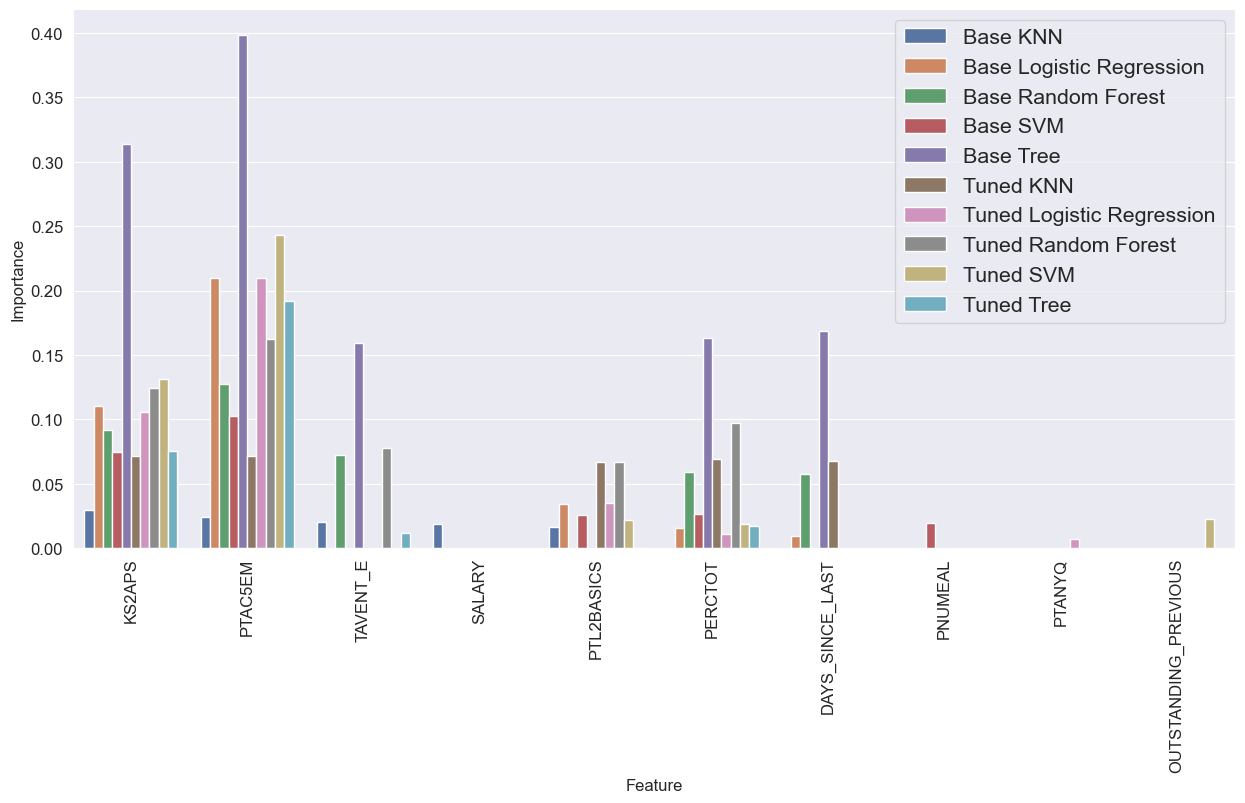

In [88]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            hue='Model', 
            data=top_5_features) 

plt.xticks(rotation=90)
ax.legend(loc="upper right")
plt.show()

In [89]:
all_importances = all_permutation_importances.groupby(['Feature'])['Importance'].mean().reset_index()

In [90]:
ordered_total = all_importances.sort_values(by = 'Importance', ascending = False).head(5)

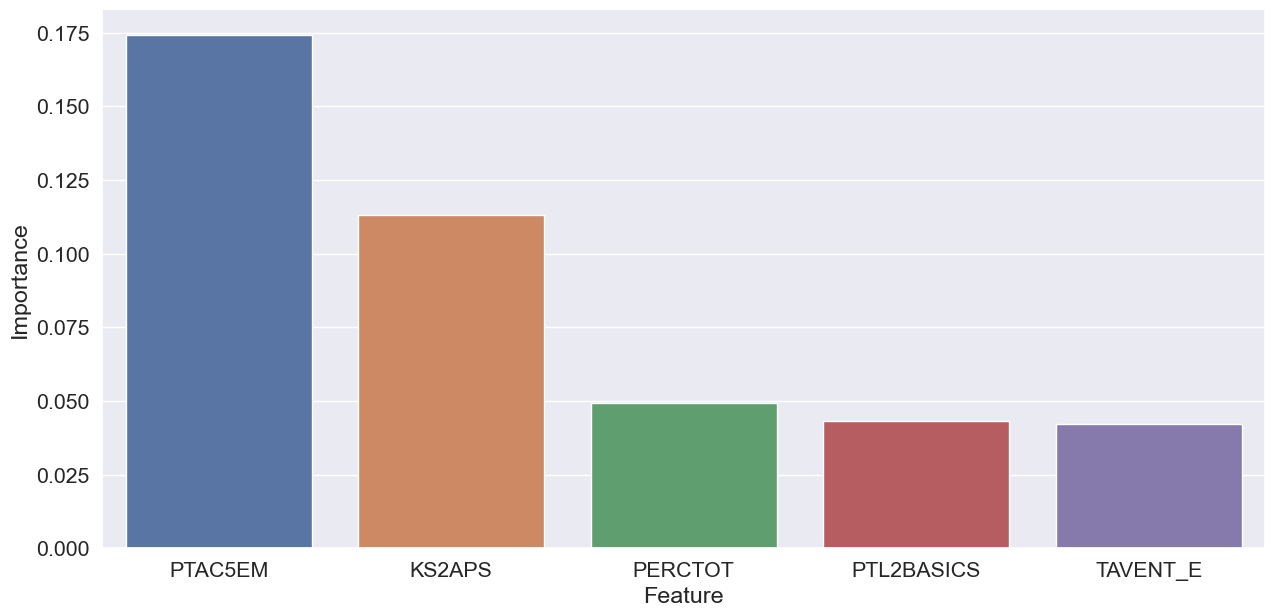

In [91]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            data=ordered_total) 

#plt.xticks(rotation=90)

plt.show()

In [92]:
unordered_total = all_importances.sort_values(by = 'Importance', ascending = True).head(5)

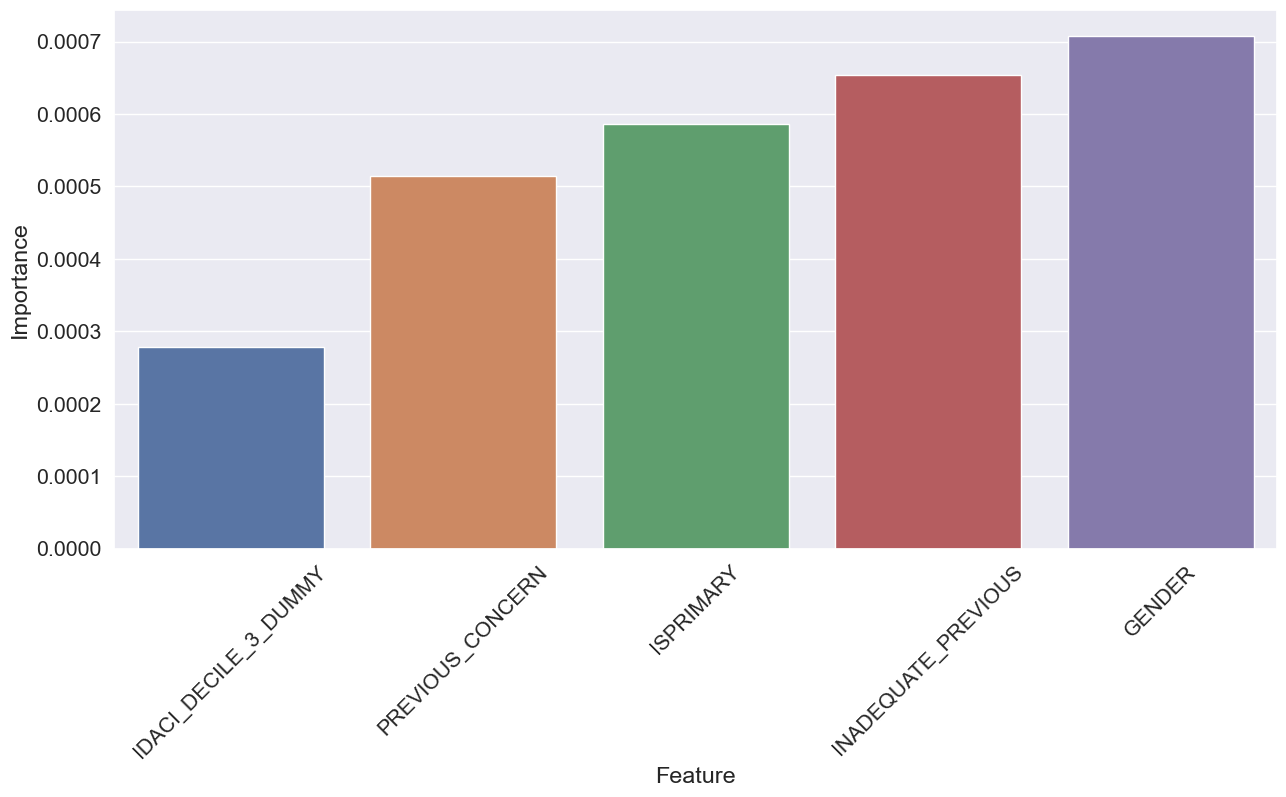

In [93]:
fig, ax = plt.subplots(figsize=(15,7))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(font_scale = 1.4)

#create grouped bar chart
sns.barplot(x='Feature',
            y='Importance', 
            data=unordered_total) 

plt.xticks(rotation=45)

plt.show()